# **What is NYC's restaurant grading system trying to measure? 🔠** 

### Let's begin by looking at some rows

In [1]:
import pandas as pd
df = pd.read_csv("Restaurant_Grades.csv")
df.tail(3)

/Users/misha/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE
184932,SOFIA'S TAQUERIA,Staten Island,4370,AMBOY ROAD,10312.0,Tex-Mex,Filth flies or food/refuse/sewage-associated (...,Critical,54,Z,01/21/2022,01/24/2022
184933,MELT SHOP,Staten Island,2655,RICHMOND AVENUE,10314.0,American,Wiping cloths soiled or not stored in sanitizi...,Critical,12,A,01/21/2022,01/24/2022
184934,BAGEL BOSS,Manhattan,263,1 AVENUE,10003.0,Jewish/Kosher,"Food contact surface not properly washed, rins...",Critical,5,A,01/21/2022,01/24/2022


### Time to clean

In [2]:
# Replace spaces with underscores
df.columns = df.columns.str.replace("CUISINE DESCRIPTION","CUISINE")
df.columns = df.columns.str.replace(" ","_")

# Convert dates to datetime
df.GRADE_DATE = pd.to_datetime(df.GRADE_DATE, format="%m/%d/%Y")
df.RECORD_DATE = pd.to_datetime(df.RECORD_DATE, format="%m/%d/%Y")

###### It looks like one row represents one inspection so many restaurants have multiple entries, let's deal with that before getting into the analysis

In [4]:
# Create a unique key based on restaurant
df["KEY"] = df[['DBA', 'BUILDING', "STREET", "ZIPCODE"]].astype(str).apply(lambda x: ' '.join(x), axis=1)
print("num ratings: {} num unique restaurants: {}".format(len(df), len(df.KEY.unique())))

num ratings: 184935 num unique restaurants: 25006


### We can now see above that there are around 180,000 entries but only 25,000 unique restaurants in the dataset. 


#### Let's get rid of duplicate entries now

In [5]:
dfnew = df[["KEY","DBA","BORO","CUISINE","SCORE","GRADE","GRADE_DATE","RECORD_DATE"]].drop_duplicates()
dfnew = dfnew.sort_values(["KEY","GRADE_DATE"],ascending=[True,False])
dfnew.head(3)

,KEY,DBA,BORO,CUISINE,SCORE,GRADE,GRADE_DATE,RECORD_DATE
154748,#1 GARDEN CHINESE RESTAURANT 221 PROSPECT PARK...,#1 GARDEN CHINESE RESTAURANT,Brooklyn,Chinese,10,A,2019-12-16,2022-01-24
126163,#1 GARDEN CHINESE RESTAURANT 221 PROSPECT PARK...,#1 GARDEN CHINESE RESTAURANT,Brooklyn,Chinese,19,B,2019-07-25,2022-01-24
89412,#1 GARDEN CHINESE RESTAURANT 221 PROSPECT PARK...,#1 GARDEN CHINESE RESTAURANT,Brooklyn,Chinese,12,A,2019-02-06,2022-01-24


In [7]:
print("num ratings: {} num unique restaurants: {}".format(len(dfnew), len(dfnew.KEY.unique())))

num ratings: 73112 num unique restaurants: 25006


In [8]:
dfnew = dfnew.sort_values(["KEY","GRADE_DATE"],ascending=[True,False])

,KEY,DBA,BORO,CUISINE,SCORE,GRADE,GRADE_DATE,RECORD_DATE
154748,#1 GARDEN CHINESE RESTAURANT 221 PROSPECT PARK...,#1 GARDEN CHINESE RESTAURANT,Brooklyn,Chinese,10,A,2019-12-16,2022-01-24
126163,#1 GARDEN CHINESE RESTAURANT 221 PROSPECT PARK...,#1 GARDEN CHINESE RESTAURANT,Brooklyn,Chinese,19,B,2019-07-25,2022-01-24
89412,#1 GARDEN CHINESE RESTAURANT 221 PROSPECT PARK...,#1 GARDEN CHINESE RESTAURANT,Brooklyn,Chinese,12,A,2019-02-06,2022-01-24
55470,#1 GARDEN CHINESE RESTAURANT 221 PROSPECT PARK...,#1 GARDEN CHINESE RESTAURANT,Brooklyn,Chinese,27,B,2018-06-21,2022-01-24
164108,#1 NATURAL JUICE BAR 685 SENECA AVENUE 11385.0,#1 NATURAL JUICE BAR,Queens,"Juice, Smoothies, Fruit Salads",10,A,2020-02-06,2022-01-24
...,...,...,...,...,...,...,...,...
179855,red bamboo 140 WEST 4 STREET 10012.0,red bamboo,Manhattan,Chinese,10,A,2021-11-09,2022-01-24
163688,tutto il giorno 114 FRANKLIN STREET 10013.0,tutto il giorno,Manhattan,Italian,5,A,2020-02-05,2022-01-24
80865,tutto il giorno 114 FRANKLIN STREET 10013.0,tutto il giorno,Manhattan,Italian,7,A,2018-12-12,2022-01-24
18885,tutto il giorno 114 FRANKLIN STREET 10013.0,tutto il giorno,Manhattan,Italian,8,A,2017-07-14,2022-01-24


## Let's look at the grade breakdown now

In [9]:
import matplotlib.pyplot as plt

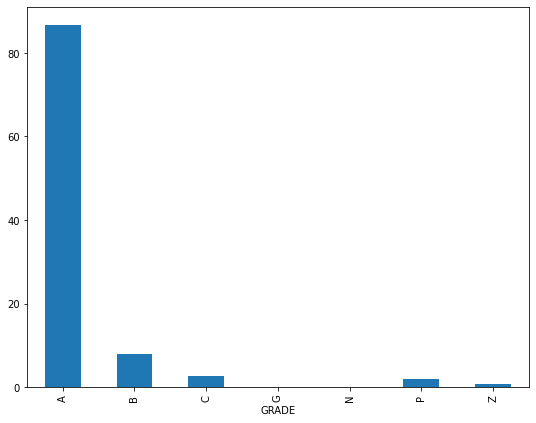

In [10]:
grade_cut = dfnew.groupby("GRADE").GRADE.agg(["count"])
grade_cut["% of grades assigned in last year"]= grade_cut/grade_cut.sum()*100
 
grade_plot=grade_cut["% of grades assigned in last year"].plot(kind="bar")

fig = plt.gcf()
fig.set_size_inches(9,7)

plt.show()

### This looks very ugly, so I threw it on Datawrapper

In [11]:
grade_cut

,count,% of grades assigned in last year
GRADE,,
A,63449,86.783291
B,5743,7.855072
C,1953,2.671244
G,1,0.001368
N,4,0.005471
P,1391,1.902560
Z,571,0.780994


In [12]:
grade_cut.to_csv('out.csv')

## But like why so many A's? 🤨

In [14]:
dfz = dfnew[dfnew.GRADE == 'Z']
dfz.KEY.unique()

,KEY,DBA,BORO,CUISINE,SCORE,GRADE,GRADE_DATE,RECORD_DATE
179314,16 HANDLES 178 8 AVENUE 10011.0,16 HANDLES,Manhattan,Frozen Desserts,21,Z,2021-10-27,2022-01-24
166464,18 LOUNGE KTV 8732 18 AVENUE 11214.0,18 LOUNGE KTV,Brooklyn,Bottled Beverages,9,Z,2020-02-19,2022-01-24
179748,3 BROS 99 CENTS PIZZA 2503 30TH AVE 11102.0,3 BROS 99 CENTS PIZZA,Queens,Pizza,66,Z,2021-11-08,2022-01-24
182600,3 TIMES 38 WATER STREET 10004.0,3 TIMES,Manhattan,Asian/Asian Fusion,24,Z,2021-12-29,2022-01-24
181315,5IVE SPICE 227 MULBERRY STREET 10012.0,5IVE SPICE,Manhattan,Other,37,Z,2021-12-03,2022-01-24
...,...,...,...,...,...,...,...,...
180488,ZANMI RESTAURANT 1206 NOSTRAND AVENUE 11225.0,ZANMI RESTAURANT,Brooklyn,Caribbean,3,Z,2021-11-24,2022-01-24
180011,ZERDA 101 SMITH STREET 11201.0,ZERDA,Brooklyn,Mediterranean,9,Z,2021-11-12,2022-01-24
174176,ZEYTIN MEDITERRANEAN CUISINE 160 PEARL STREET ...,ZEYTIN MEDITERRANEAN CUISINE,Manhattan,Mediterranean,38,Z,2021-08-03,2022-01-24
179555,ZINGER CHICKEN & GRILL 367 AVENUE X 11223.0,ZINGER CHICKEN & GRILL,Brooklyn,Chicken,2,Z,2021-11-03,2022-01-24


In [18]:
dfz.KEY.unique()

array(['16 HANDLES 178 8 AVENUE 10011.0',
       '18 LOUNGE KTV 8732 18 AVENUE 11214.0',
       '3 BROS 99 CENTS PIZZA 2503 30TH AVE 11102.0',
       '3 TIMES 38 WATER STREET 10004.0',
       '5IVE SPICE 227 MULBERRY STREET 10012.0',
       '787 COFFEE 228 EAST   80 STREET 10075.0',
       '99 CENT SUPREME PIZZA 399 EAST  149 STREET 10455.0',
       '99C PIZZA 246 EAST   14 STREET 10003.0',
       'A&A FOOD MARKET 481 AMSTERDAM AVENUE 10024.0',
       'ABUMI SUSHI 207 EAST   26 STREET 10010.0',
       'ACE THAI KITCHEN 330 MYRTLE AVENUE 11205.0',
       'AGAVE 488 3 AVENUE 10016.0', 'ALADDIN 2906 36 AVENUE 11106.0',
       'ALL ABOUT INDIAN FOOD 443 BUSHWICK AVENUE 11206.0',
       'ALLERTON RESTAURANT 772 ALLERTON AVENUE 10467.0',
       'ALOHA BROOKLYN GRILL 3221 FULTON STREET 11208.0',
       'AM THAI BISTRO 1003 CHURCH AVENUE 11218.0',
       "ANDREA'S RESTAURANT 104 EAST  165 STREET 10452.0",
       "ARTICHOKE BASILLE'S PIZZA & BAR 111 MACDOUGAL STREET 10012.0",
       "ARTICHOKE 

In [33]:
restaurant_names = dfz.KEY.unique()
mydf = dfnew[dfnew.KEY.isin(restaurant_names)]
mydf.head(123)

,KEY,DBA,BORO,CUISINE,SCORE,GRADE,GRADE_DATE,RECORD_DATE
179314,16 HANDLES 178 8 AVENUE 10011.0,16 HANDLES,Manhattan,Frozen Desserts,21,Z,2021-10-27,2022-01-24
166464,18 LOUNGE KTV 8732 18 AVENUE 11214.0,18 LOUNGE KTV,Brooklyn,Bottled Beverages,9,Z,2020-02-19,2022-01-24
179748,3 BROS 99 CENTS PIZZA 2503 30TH AVE 11102.0,3 BROS 99 CENTS PIZZA,Queens,Pizza,66,Z,2021-11-08,2022-01-24
182600,3 TIMES 38 WATER STREET 10004.0,3 TIMES,Manhattan,Asian/Asian Fusion,24,Z,2021-12-29,2022-01-24
181315,5IVE SPICE 227 MULBERRY STREET 10012.0,5IVE SPICE,Manhattan,Other,37,Z,2021-12-03,2022-01-24
...,...,...,...,...,...,...,...,...
178703,BEST GRILL BAO 4917 8 AVENUE 11220.0,BEST GRILL BAO,Brooklyn,Chinese,66,Z,2021-10-01,2022-01-24
182665,BEST WOK 1820A FLATBUSH AVENUE 11210.0,BEST WOK,Brooklyn,Chinese,26,Z,2022-01-03,2022-01-24
181595,BEST WOK 1820A FLATBUSH AVENUE 11210.0,BEST WOK,Brooklyn,Chinese,3,P,2021-12-07,2022-01-24
160042,BETTER BEING 537 9 AVENUE 10018.0,BETTER BEING,Manhattan,American,2,Z,2020-01-17,2022-01-24


In [26]:
mydf.sample(n=15)

,KEY,DBA,BORO,CUISINE,SCORE,GRADE,GRADE_DATE,RECORD_DATE
151749,BIG BOWL NOODLE 513 6 AVENUE 10011.0,BIG BOWL NOODLE,Manhattan,Asian/Asian Fusion,4,Z,2019-11-29,2022-01-24
17499,RAMEN-YA 133 WEST 3 STREET 10012.0,RAMEN-YA,Manhattan,Japanese,12,A,2017-06-27,2022-01-24
163009,HAPPY WOK 6619 BEACH CHANNEL DR 11692.0,HAPPY WOK,Queens,Chinese,9,Z,2020-02-03,2022-01-24
127647,BROADWAY FISH MARKET 4810 BROADWAY 11103.0,BROADWAY FISH MARKET,Queens,Seafood,9,P,2019-07-31,2022-01-24
72509,HO MEI CHINESE RESTAURANT 222 MALCOM X BOULEVA...,HO MEI CHINESE RESTAURANT,Brooklyn,Chinese,12,A,2018-10-15,2022-01-24
66950,GAETANA'S CUCINA ITALIANA 143 CHRISTOPHER STRE...,GAETANA'S CUCINA ITALIANA,Manhattan,Italian,19,B,2018-09-11,2022-01-24
132760,WOLFNIGHTS 99 RIVINGTON STREET 10002.0,WOLFNIGHTS,Manhattan,American,13,A,2019-08-27,2022-01-24
37588,MAMA G AFRICAN KITCHEN 3650A WHITE PLAINS ROAD...,MAMA G AFRICAN KITCHEN,Bronx,African,17,B,2018-02-01,2022-01-24
87271,SUBWAY 7422 BROADWAY 11373.0,SUBWAY,Queens,Sandwiches,29,C,2019-01-24,2022-01-24
162765,ISLAND TRINI BURGER 2093 NOSTRAND AVENUE 11210.0,ISLAND TRINI BURGER,Brooklyn,Caribbean,11,P,2020-01-31,2022-01-24


In [22]:
mydf.KEY.unique()

array(['16 HANDLES 178 8 AVENUE 10011.0',
       '18 LOUNGE KTV 8732 18 AVENUE 11214.0',
       '3 BROS 99 CENTS PIZZA 2503 30TH AVE 11102.0',
       '3 TIMES 38 WATER STREET 10004.0',
       '5IVE SPICE 227 MULBERRY STREET 10012.0',
       '787 COFFEE 228 EAST   80 STREET 10075.0',
       '99 CENT SUPREME PIZZA 399 EAST  149 STREET 10455.0',
       '99C PIZZA 246 EAST   14 STREET 10003.0',
       'A&A FOOD MARKET 481 AMSTERDAM AVENUE 10024.0',
       'ABUMI SUSHI 207 EAST   26 STREET 10010.0',
       'ACE THAI KITCHEN 330 MYRTLE AVENUE 11205.0',
       'AGAVE 488 3 AVENUE 10016.0', 'ALADDIN 2906 36 AVENUE 11106.0',
       'ALL ABOUT INDIAN FOOD 443 BUSHWICK AVENUE 11206.0',
       'ALLERTON RESTAURANT 772 ALLERTON AVENUE 10467.0',
       'ALOHA BROOKLYN GRILL 3221 FULTON STREET 11208.0',
       'AM THAI BISTRO 1003 CHURCH AVENUE 11218.0',
       "ANDREA'S RESTAURANT 104 EAST  165 STREET 10452.0",
       "ARTICHOKE BASILLE'S PIZZA & BAR 111 MACDOUGAL STREET 10012.0",
       "ARTICHOKE 

In [15]:
fscore = dfz.groupby("SCORE").SCORE.agg(["count"])
fscore["perc"] = fscore / fscore.sum() * 100

fscore_recent = dfz.drop_duplicates("KEY").groupby("SCORE").GRADE.agg(["count"])
fscore_recent["perc"] = fscore_recent / fscore_recent.sum() * 100

fscore = fscore.join(fscore_recent,lsuffix=" all", rsuffix=" most recent")#
fscore.style.format("{:,.2f}")

,count all,perc all,count most recent,perc most recent
SCORE,,,,
0,36.00,6.30,36.00,6.32
2,78.00,13.66,78.00,13.68
3,37.00,6.48,37.00,6.49
4,24.00,4.20,24.00,4.21
5,22.00,3.85,22.00,3.86
6,6.00,1.05,6.00,1.05
7,17.00,2.98,17.00,2.98
8,2.00,0.35,2.00,0.35
9,52.00,9.11,52.00,9.12


In [17]:
fscore.to_csv('zscore.csv')